In [332]:
import numpy as np
from scipy import linalg as la
from os import walk
from random import sample
from scipy.ndimage import imread
from matplotlib import pyplot as plt
import scipy as sp
from scipy import special
import statsmodels.formula.api as smf
from matplotlib.colors import LogNorm

%matplotlib inline

## Anscombe’s quartet
The set that is found in the first subplot follows a scattered distribution of usual data sampled.
The set that is found in the second subplot follows a 2nd degree polynomial behavior.
The set that is found in the third subplot follows a 1st degree polynomial behavior but has an outlier that stabilizes the average and distribution of the data set.
The set that is found in the first subplot follows a very uniform distribution, except for the outlier. It is similar to the previous set, except for the x-axis distribution.

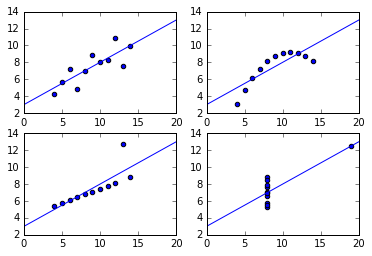

In [333]:
plt.title("Anscombes Quartet")
my_file = np.load("anscombe.npy")

index = [1,1,2,2]
x = np.linspace(0,20,100)
for i in xrange(4):
    plt.subplot(2,2,i+1)
    plt.scatter(my_file[:,i*2],my_file[:,i*2+1])
    plt.plot(x, (x)*.5 + 3)
    plt.xlim(0,20)

## Bernstein polynomial
The following graph represents several different Bernstein polynomials according to their n and v. The title describes each polynomial.

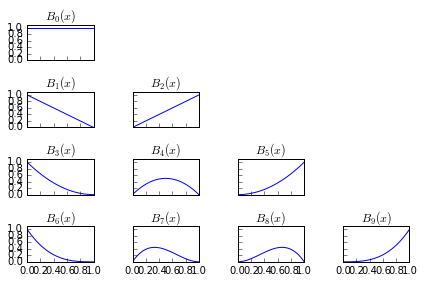

In [334]:
n_ = [0,1,2,3]
x_ = x = np.linspace(0, 1, 100)
matrix = np.zeros((len(n_),len(n_)))
i = 0
d = 0
for n in xrange(4):
    
    for k in xrange(i+1):
        binom = special.binom(n,k)
        #matrix[n,k] = binom*(x_**k)*(1-x)**(n-k)
        #print (i+1),(n+1),(k+1)
        plt.subplot(4,4,4*n+(k)+1)
        plt.tight_layout()
        plt.plot(x_, binom*np.multiply((x_**k),(1-x)**(n-k)))
        plt.axis([0, 1., 0, 1.1])
        
        plt.tick_params(which="both", top="off", right="off")
        if (4*n+(k)+1) < 12:
            plt.tick_params(labelbottom="off")
        if (4*n+(k)) % 4:
            plt.tick_params(labelleft="off")
        plt.title(r"$B_{}(x)$".format(d))
        
        
        plt.show
        d += 1
    i += 1

## MLB Player Statistics
The following graph describes some players features. The red line represents weight regressed from height. The color of each point represents each players age.

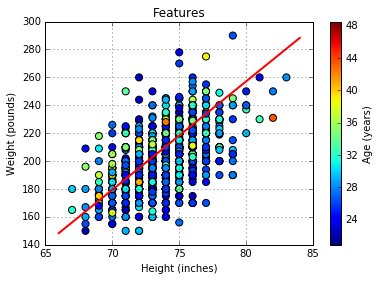

In [335]:
plt.title("Features")
my_file = np.load("MLB.npy")
plt.scatter(my_file[:,0],my_file[:,1], c=my_file[:,2], s=50)
x = np.linspace(66,84,300)
plt.plot(x, x*(280-140)/(84-66)-365, "r-", lw = 2)
cbar = plt.colorbar()
cbar.set_label("Age (years)")
plt.grid()
plt.ylabel("Weight (pounds)")
plt.xlabel("Height (inches)")
plt.show()


# Earthquakes

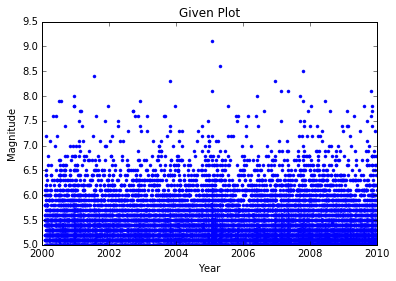

In [336]:
plt.title("Given Plot")
year, magnitude, longitude, latitude = np.load("earthquakes.npy").T
im_info = np.load("earthquakes.npy").T
plt.plot(year, magnitude, '.')
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.show()

## Annual Frequency
The following histogram represents the number of earthquakes registered each year.

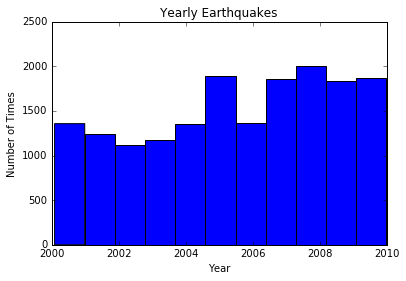

In [337]:
plt.title("Yearly Earthquakes")
plt.hist(year, bins=11)
plt.xlabel("Year")
plt.ylabel("Number of Times")
plt.show()

## Magnitude Frequency
A log-scaled graph that represents the frequency of each magnitude of earthquake.

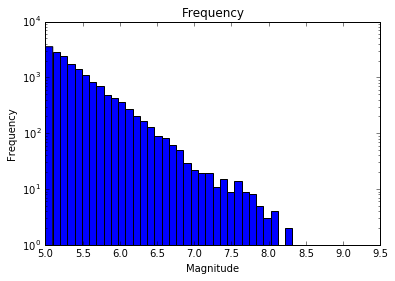

In [338]:
plt.title("Frequency")
plt.hist(magnitude, log=True, bins= 42)
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

## Geographical Location
A plot that shows where earthquakes have occurred. Each point is an earthquake, and the color of the dot represents the magnitude of the earthquake.

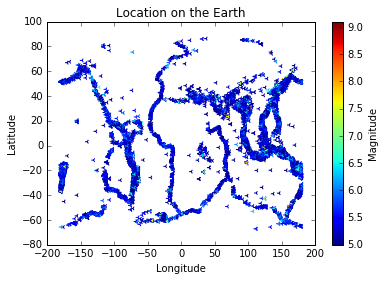

In [339]:
plt.title("Location on the Earth")
plt.scatter(longitude,latitude, c=magnitude, s=20, marker="3"
           )
cbar = plt.colorbar()
cbar.set_label("Magnitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Problem 5
## Rosenbrock function
Visual representation through a contour plot of the Rosenbrock function.

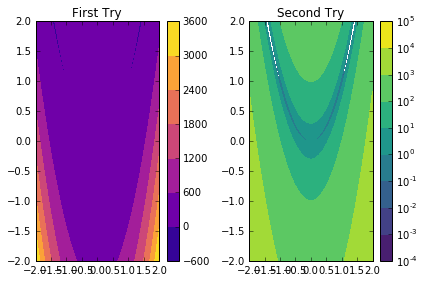

In [340]:
x = np.linspace(-2., 2., 500)
X, Y = np.meshgrid(x, x.copy())
Z = (1-X**2) + 100*(Y-X**2)**2

plt.subplot(121)
plt.title("First Try")
plt.contourf(X, Y, Z, cmap="plasma")
plt.colorbar()

plt.subplot(122)
plt.title("Second Try")
plt.contourf(X, Y, Z, 6, cmap="viridis", norm=LogNorm())
plt.colorbar()
plt.tight_layout()
plt.show()

# Countries Representation

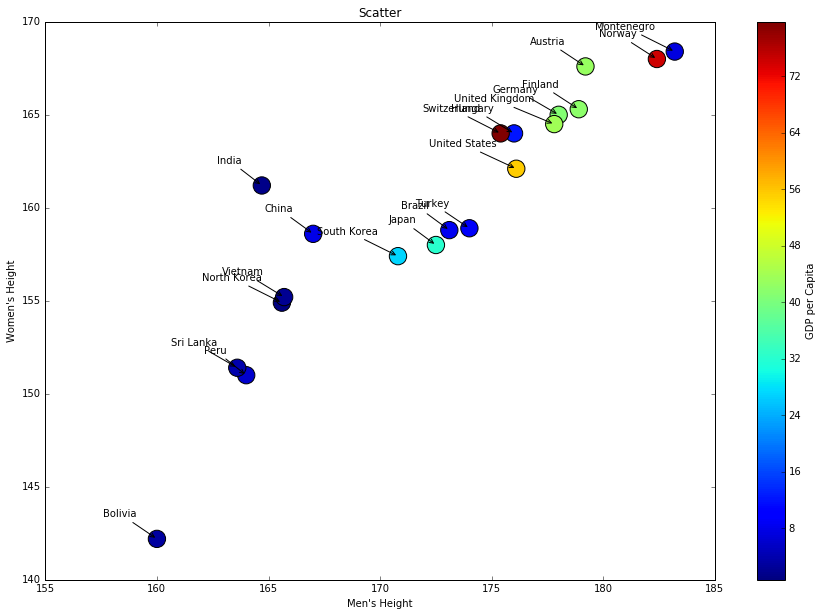

In [345]:
my_file2 = np.load("countries.npy")
countries = ["Austria", "Bolivia", "Brazil", "China",
"Finland", "Germany", "Hungary", "India",
"Japan", "North Korea", "Montenegro", "Norway",
"Peru", "South Korea", "Sri Lanka", "Switzerland",
"Turkey", "United Kingdom", "United States", "Vietnam"]
gdp_percap = np.multiply(my_file2[:,1],my_file2[:,0]**(-1.))
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Scatter")

plt.scatter(my_file2[:,2],my_file2[:,3], c = gdp_percap, s=300, marker="o")
           
for label, x, y in zip(countries, my_file2[:,2], my_file2[:,3]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.1),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

cbar = plt.colorbar()
cbar.set_label("GDP per Capita")
plt.xlabel("Men's Height")
plt.ylabel("Women's Height")
plt.show()



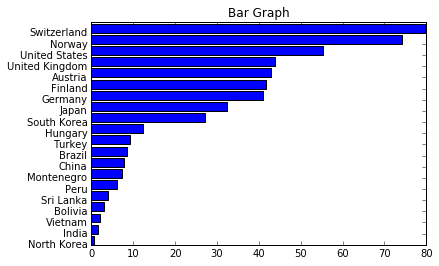

In [346]:
plt.title("Bar Graph")
idx = gdp_percap.argsort()[:]
gdp_percap2 = gdp_percap[idx]
#print idx
#print countries
countries2 = [countries[i] for i in idx]
plt.barh(xrange(len(countries2)), gdp_percap2)
plt.yticks(xrange(len(countries2)), countries2)
plt.show()

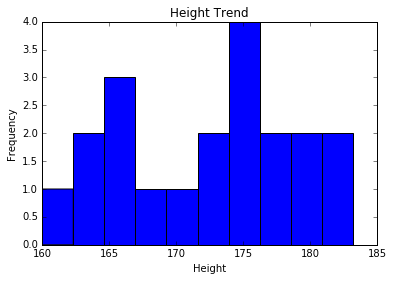

In [347]:
plt.title("Height Trend")
plt.hist(my_file2[:,2], bins= 10)
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()

In [348]:
for n in range(9):
    plt.subplot(3, 3, n+1)
    plt.plot(x, T(n)(x), lw=2)
    plt.axis([-1.1, 1.1, -1.1, 1.1])

    # Turn off extra tick marks and axis labels.
    plt.tick_params(which="both", top="off", right="off")
    if n < 6: # Remove x-axis label on upper plots.
    plt.tick_params(labelbottom="off")
    if n % 3: # Remove y-axis label on right plots.
    plt.tick_params(labelleft="off")
    plt.title("n = "+str(n))

IndentationError: expected an indented block (<ipython-input-348-526032d9b22a>, line 9)

[0, 20, 0, 20]

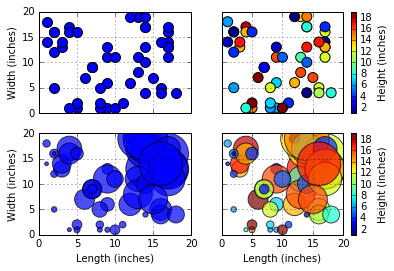

In [349]:
length, width, height = np.random.randint(1, 20, (3,50))
plt.subplot(221) # Plot length against width.
plt.scatter(length, width, s=100)
plt.grid()
plt.ylabel("Width (inches)")
plt.tick_params(labelbottom="off")
plt.axis([0, 20, 0, 20])

plt.subplot(222) # Set the marker color to the height.
plt.scatter(length, width, c=height, s=100)
cbar = plt.colorbar()
cbar.set_label("Height (inches)")
plt.grid()
plt.tick_params(labelbottom="off", labelleft="off")
plt.axis([0, 20, 0, 20])
plt.subplot(223) # Set the marker size to half the volume.
plt.scatter(length, width, s=length*width*height/2., alpha=.7)
plt.grid()
plt.xlabel("Length (inches)")
plt.ylabel("Width (inches)")
plt.axis([0, 20, 0, 20])
plt.subplot(224) # Use color and marker size together.
plt.scatter(length, width, c=height, s=length*width*height/2., alpha=.7)
cbar = plt.colorbar()
cbar.set_label("Height (inches)")
plt.grid()
plt.tick_params(labelleft="off")
plt.xlabel("Length (inches)")
plt.axis([0, 20, 0, 20])